In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip", sep = ';', header=0, low_memory=False)

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# #convert 'date' and 'time' to a time series object and use 'date' as index
from datetime import datetime

df['Date'] = pd.to_datetime(df.Date)
df['Time'] = pd.to_datetime(df.Time)
df.set_index('Date', inplace = True)

In [ ]:
#Replace "?"  with NAN
df.replace("?", "NaN", inplace = True)

In [ ]:
# #Convert object types to float

df.Global_active_power = df.Global_active_power.astype(float)
df.Global_reactive_power = df.Global_reactive_power.astype(float)
df.Voltage = df.Voltage.astype(float)
df.Global_intensity = df.Global_intensity.astype(float) 
df.Sub_metering_1 = df.Sub_metering_1.astype(float) 
df.Sub_metering_2 = df.Sub_metering_2.astype(float) 

In [ ]:
df.dtypes

Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [ ]:
#check for missing values
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
#Fill missing values with mean
df=df.fillna(df.mean())

#recheck missing values
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Text(0.5, 1.0, 'Upsampled Data by Day')

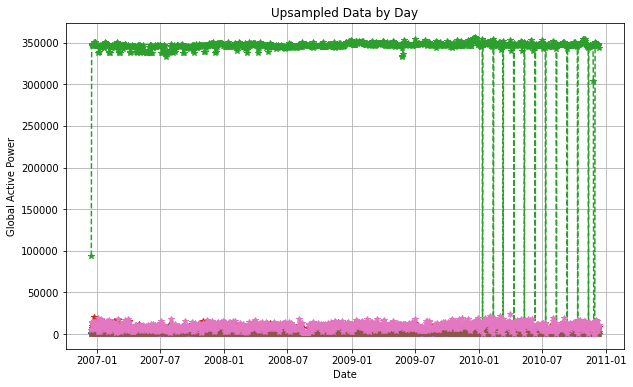

In [ ]:
#Resample to daily data points
df_daily = df.resample('D').sum()

plt.figure(figsize=(10,6))
plt.plot(df_daily, '--', marker='*')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('Upsampled Data by Day')

In [ ]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


Text(0.5, 1.0, 'Plot of Passengers by Year')

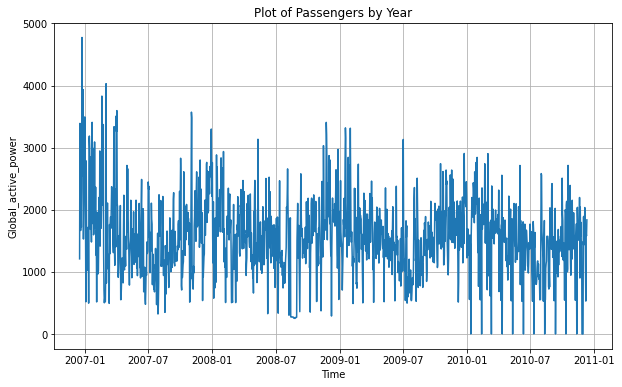

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Global_active_power )
plt.grid()
plt.xlabel('Time')
plt.ylabel('Global_active_power')
plt.title('Plot of Passengers by Year')

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_daily.Global_active_power, df_daily.Global_reactive_power)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.127


In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_daily.Voltage , df_daily.Global_intensity)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.269


Text(0.5, 1.0, 'Upsampled Data by Month')

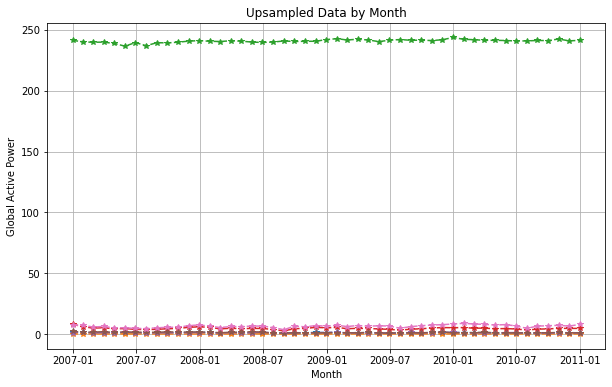

In [ ]:
#Resample to monthly data points
df_monthly = df.resample('M').mean()

plt.figure(figsize=(10,6))
plt.plot(df_monthly, '--', marker='*')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Global Active Power')
plt.title('Upsampled Data by Month')

Text(0.5, 1.0, 'Resampled Data')

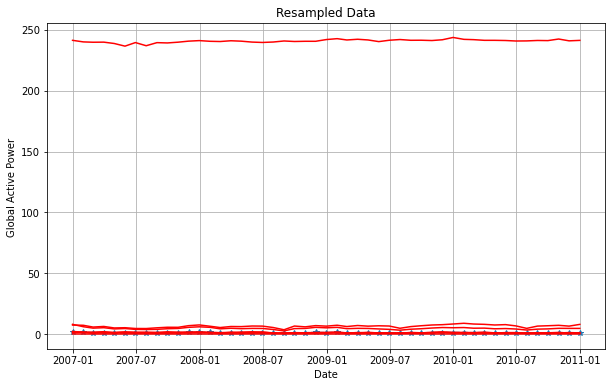

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_monthly.index, df_monthly.Global_active_power , '--',marker='*')
plt.plot(df_monthly, 'red')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Global Active Power ')
plt.title('Resampled Data')

Text(0.5, 1.0, 'Upsampled Data by Year')

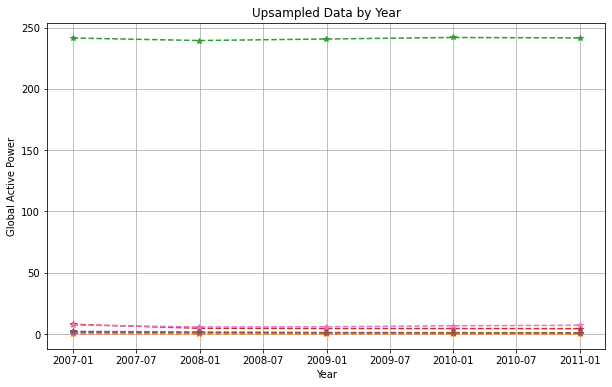

In [ ]:
# #Resample to yearly data points
df_yearly = df.resample('Y').mean()

plt.figure(figsize=(10,6))
plt.plot(df_yearly, '--', marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global Active Power')
plt.title('Upsampled Data by Year')

### Time Series Specific Exploratory Methods

In [ ]:
import statsmodels.api as sm
from pylab import rcParams

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


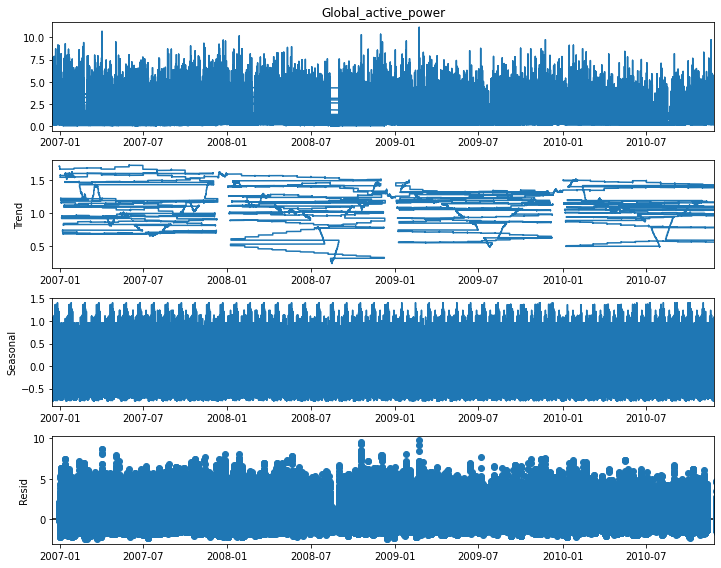

In [ ]:
rcParams['figure.figsize'] = 10, 8
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', freq= (60*24*30))
decompose_series.plot()
plt.show()

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data 
has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.




In [ ]:
#ADF test for stationarity

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Global_active_power'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -9.609344713081734
p-value: 1.8294723965611374e-16
No. of lags used: 7
No. of observations used : 1449
Critical Values:
   1%: -3.4348709954268384
   5%: -2.863536715724964
   10%: -2.567833035595811


The ADF statistic is smaller than the 5 % critical values. That tells us that we are 95% confident that this series is stationary.

In [ ]:
# #ADF test for stationarity

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_monthly['Global_active_power'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
     print(f'   {k}: {v}')

ADF Statistic: -2.5111545995957725
p-value: 0.11278382640716711
No. of lags used: 11
No. of observations used : 37
Critical Values:
   1%: -3.6209175221605827
   5%: -2.9435394610388332
   10%: -2.6104002410518627


In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 103 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638462 sha256=688590b1beba47ab1004b522d211472f64f1b2538c3fbde1743d5c41face6269
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [ ]:
df_daily_copy = df_daily.reset_index()
df_daily_copy.head(2)

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0


In [ ]:
#Create a subset of date and Global_active_power
df_daily_copy = df_daily_copy[['Date','Global_active_power']]
df_daily_copy.head()

,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [ ]:
df_daily_copy = df_daily_copy.rename(columns={"Date": "ds", "Global_active_power": "y"})

In [ ]:
df_daily_copy.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [ ]:
X = df_daily_copy
y  = df_daily_copy.y

In [ ]:
x = int(len(X))
X_train, X_test = X[:365], X[365:]
y_train, y_test = y[:365], y[365:]      

In [ ]:
model = Prophet()
model.fit(X_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#predict for the next 12 months
future = model.make_future_dataframe(periods=20, freq='D') 
forecast = model.predict(future) 
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,2116.667327,1425.895528,3027.428357,2116.667327,2116.667327,100.468514,100.468514,100.468514,100.468514,100.468514,100.468514,0.0,0.0,0.0,2217.135842
1,2006-12-17,2112.569323,1444.730038,3159.947915,2112.569323,2112.569323,185.099277,185.099277,185.099277,185.099277,185.099277,185.099277,0.0,0.0,0.0,2297.668600
2,2006-12-18,2108.471319,1318.739145,2962.908550,2108.471319,2108.471319,-34.824132,-34.824132,-34.824132,-34.824132,-34.824132,-34.824132,0.0,0.0,0.0,2073.647187
3,2006-12-19,2104.373314,1269.833547,2993.937544,2104.373314,2104.373314,-33.444788,-33.444788,-33.444788,-33.444788,-33.444788,-33.444788,0.0,0.0,0.0,2070.928526
4,2006-12-20,2100.275310,1237.225588,2886.151560,2100.275310,2100.275310,-36.095898,-36.095898,-36.095898,-36.095898,-36.095898,-36.095898,0.0,0.0,0.0,2064.179412
5,2006-12-21,2096.177306,1109.322686,2853.510913,2096.177306,2096.177306,-135.292175,-135.292175,-135.292175,-135.292175,-135.292175,-135.292175,0.0,0.0,0.0,1960.885131
6,2006-12-22,2092.079301,1198.124233,2883.925638,2092.079301,2092.079301,-45.910798,-45.910798,-45.910798,-45.910798,-45.910798,-45.910798,0.0,0.0,0.0,2046.168503
7,2006-12-23,2087.981297,1362.683977,3024.607085,2087.981297,2087.981297,100.468514,100.468514,100.468514,100.468514,100.468514,100.468514,0.0,0.0,0.0,2188.449811
8,2006-12-24,2083.883293,1363.157208,3123.857180,2083.883293,2083.883293,185.099277,185.099277,185.099277,185.099277,185.099277,185.099277,0.0,0.0,0.0,2268.982570
9,2006-12-25,2079.785288,1186.701269,2870.195610,2079.785288,2079.785288,-34.824132,-34.824132,-34.824132,-34.824132,-34.824132,-34.824132,0.0,0.0,0.0,2044.961156


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2217.135842,1425.895528,3027.428357,2116.667327,2116.667327,2116.667327
1,2006-12-17,2297.668600,1444.730038,3159.947915,2112.569323,2112.569323,2112.569323
2,2006-12-18,2073.647187,1318.739145,2962.908550,2108.471319,2108.471319,2108.471319
3,2006-12-19,2070.928526,1269.833547,2993.937544,2104.373314,2104.373314,2104.373314
4,2006-12-20,2064.179412,1237.225588,2886.151560,2100.275310,2100.275310,2100.275310
...,...,...,...,...,...,...,...
380,2007-12-31,1712.531175,813.156910,2533.030180,1747.355307,1743.992948,1750.646748
381,2008-01-01,1716.584180,879.622312,2520.215752,1750.028968,1746.125750,1753.836447
382,2008-01-02,1716.606731,875.645227,2542.458743,1752.702630,1748.537518,1757.017277
383,2008-01-03,1620.084117,799.473325,2493.802658,1755.376291,1750.778478,1760.085708


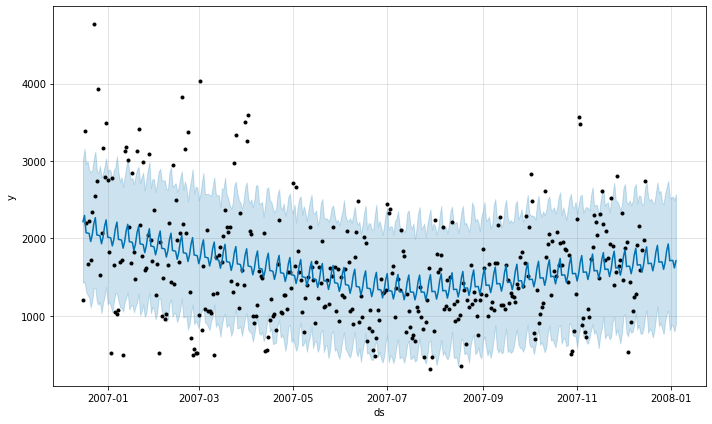

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
#Calculate MAPE

import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
actual = y_train
pred = forecast['yhat'][:365]

mape(actual, pred)

41.218657035125936

In [ ]:
#calculate rmse
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = y_train
predicted = forecast['yhat'][:365]

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

659.8951768101963
